***Predicting board game ratings***

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [5]:
df = pd.read_csv('this_is_it.csv', delimiter= ',')

In [3]:
# selecting revelant data
features = ['Min Players', 'Max Players', 'Play Time', 'Complexity Average', 'Price', 'Min Age', 'Owned Users']
target = 'Rating Average'

In [4]:
# preparing data
X = df[features]
y = df[target]

In [5]:
#spliting data using .2 for 80% is train set and the other 20 percent is our test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

In [7]:
#training
linear_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [12]:
#predictions
y_pred_linear = linear_reg.predict(X_test)
y_pred_random = random_forest.predict(X_test)

In [13]:
#evaluating performance using mae and rmse
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

In [14]:
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

In [15]:
print(f'Linear Regression MAE: {mae_linear}, RMSE: {rmse_linear}')
print(f'Random Forest MAE: {mae_random}, RMSE: {rmse_random}')

Linear Regression MAE: 0.6052952358809854, RMSE: 0.7970469815899905
Random Forest MAE: 0.5243113103665251, RMSE: 0.7079963251193624



Based on the results, the Random Forest model outperforms the Linear Regression model in predicting board game ratings. The MAE (Mean Absolute Error) for the Random Forest is 0.52, indicating that, on average, its predictions are off by 0.52 rating points. In comparison, the Linear Regression model has a slightly higher MAE of 0.61, meaning it makes larger errors on average.

The RMSE (Root Mean Squared Error), which gives more weight to larger errors, is also lower for Random Forest (0.71) compared to Linear Regression (0.80). This suggests that Random Forest handles both small and large prediction errors better, making it a more accurate model overall for predicting board game ratings.

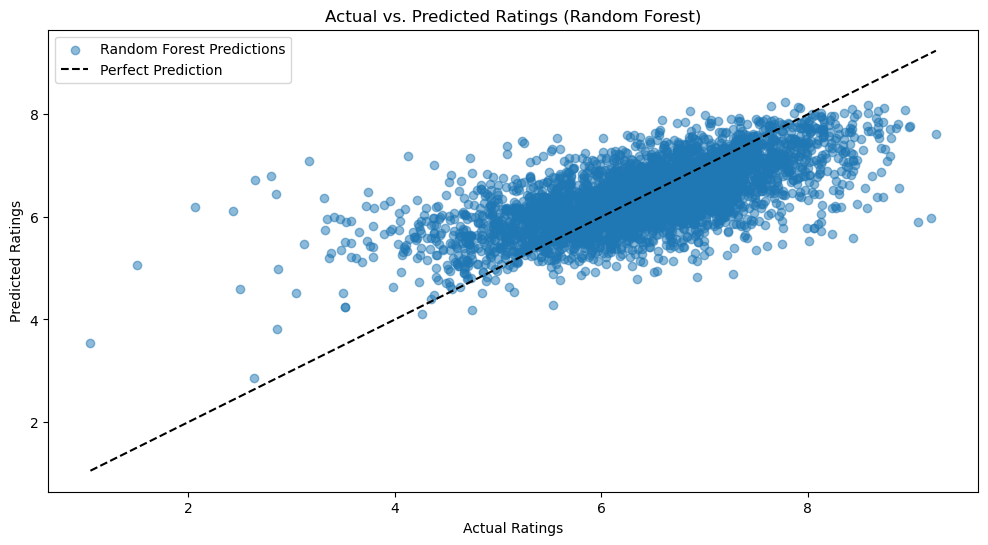

In [17]:
import matplotlib.pyplot as plt

#random
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_random, alpha=0.5, label='Random Forest Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect Prediction')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings (Random Forest)')
plt.legend()
plt.show()

closer data points to line is how well the model's predictions are to the true values.

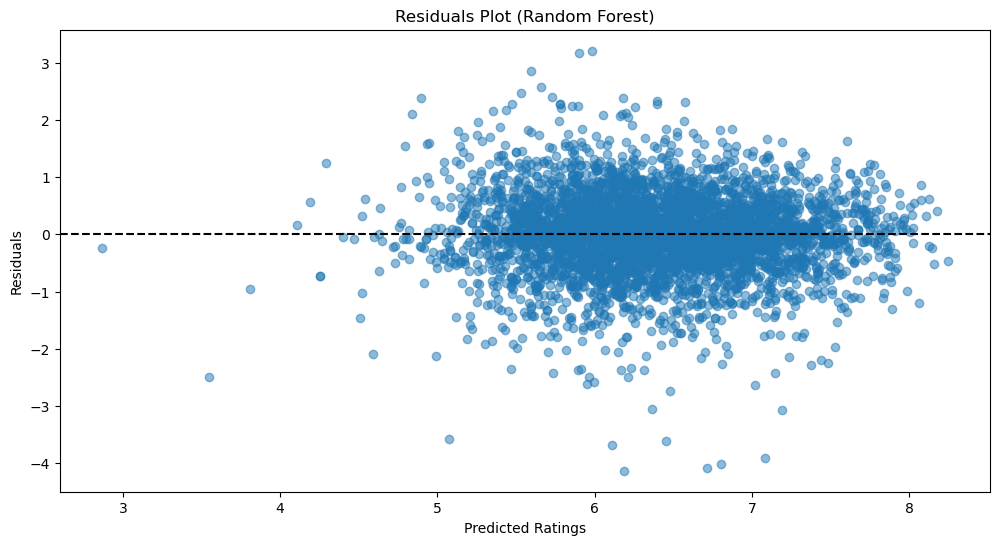

In [18]:
# Calculate residuals
residuals_rf = y_test - y_pred_random

plt.figure(figsize=(12, 6))
plt.scatter(y_pred_random, residuals_rf, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Random Forest)')
plt.show()

This plot suggests that the Random Forest model performs reasonably well, with residuals mostly centered around zero and a few outliers. The lack of a discernible pattern in the spread of residuals suggests that the model is not systematically biased. 

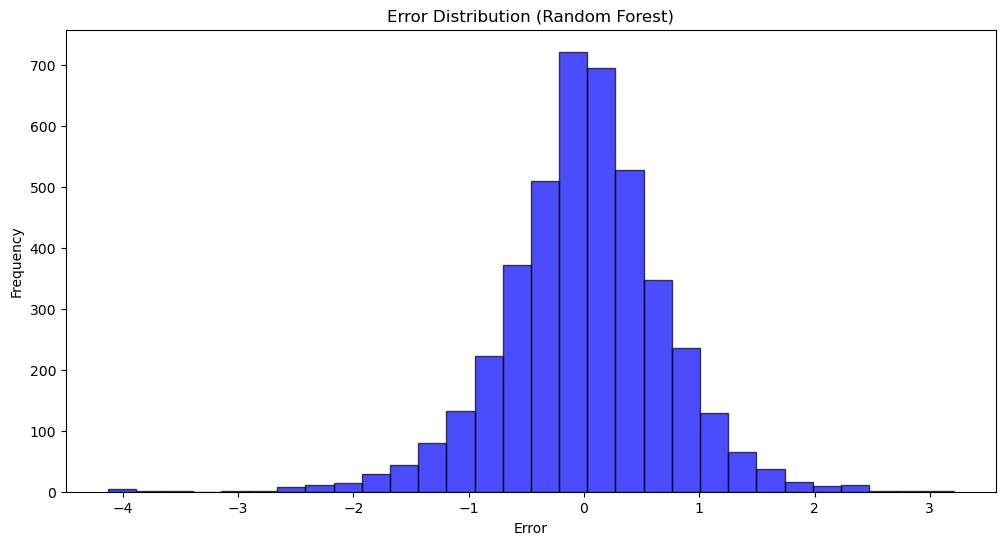

In [19]:
errors_rf = y_test - y_pred_random

plt.figure(figsize=(12, 6))
plt.hist(errors_rf, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Error Distribution (Random Forest)')
plt.show()

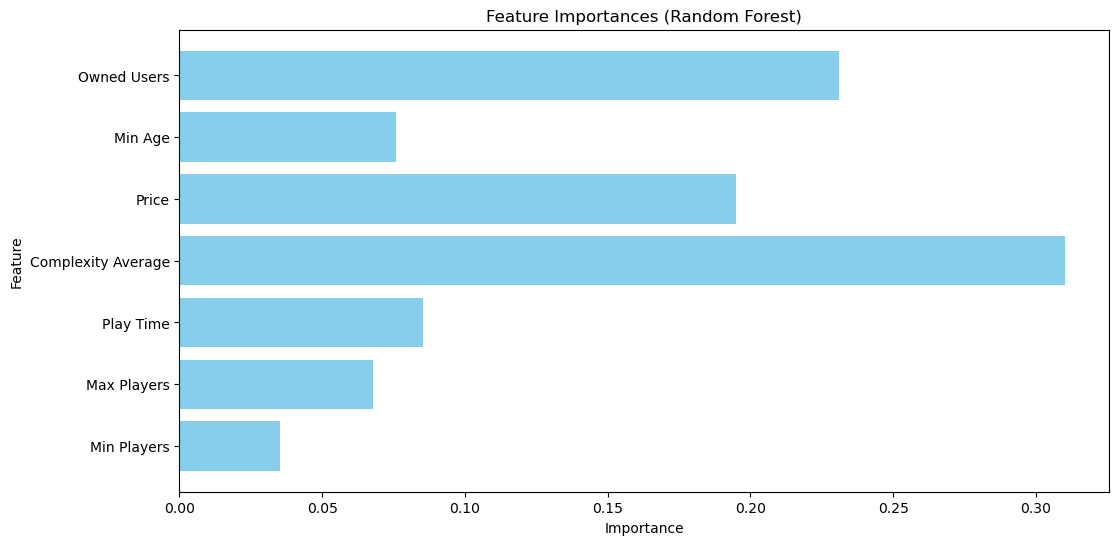

In [20]:
importances = random_forest.feature_importances_
features = X.columns

plt.figure(figsize=(12, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Random Forest)')
plt.show()

Complexity Average, Owned Users, and Price are the three most influential factors in predicting board game ratings.
Features related to the number of players (Min Players and Max Players) have a smaller effect on the model's predictions, suggesting that these features are less crucial for determining how a game is rated.

In [21]:
from scipy.stats import pearsonr

In [22]:
rating_avg = df['Rating Average']
complexity_avg = df['Complexity Average']

In [23]:
correlation, p_value = pearsonr(rating_avg, complexity_avg)

In [24]:
print(f'Pearson Correlation Coefficient: {correlation}')
print(f'p-value: {p_value}')

Pearson Correlation Coefficient: 0.4794795824685551
p-value: 0.0


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


def categorize_ratings(rating):
    if rating < 3.0:
        return 'Low'
    elif rating < 7.0:
        return 'Medium'
    else:
        return 'High'

df['Rating Category'] = df['Rating Average'].apply(categorize_ratings)

# Prepare data
X = df[['Min Players', 'Max Players', 'Play Time', 'Complexity Average', 'Price']]
y = df['Rating Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[ 558    0  533]
 [   1    1    9]
 [ 353    0 2783]]

Classification Report:
              precision    recall  f1-score   support

        High       0.61      0.51      0.56      1091
         Low       1.00      0.09      0.17        11
      Medium       0.84      0.89      0.86      3136

    accuracy                           0.79      4238
   macro avg       0.82      0.50      0.53      4238
weighted avg       0.78      0.79      0.78      4238



model preforms well for the meduim ratings probably because the dataset is filled with meduim ratings
model does not do so well for low ratings probably because small number of lowe rating samples
for high ratings its okay

## Predict the average rating of a board game based on features such as players,playtime, and complexity

In [36]:
X2 = df[['Min Players', 'Max Players', 'Play Time', 'Complexity Average']]
y2 = df['Rating Average']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2 ,test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
pred = model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, pred)

In [42]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.683893932150294
Root Mean Squared Error: 0.8269787978843799
R^2 Score: 0.22670786526380204


In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
random_forest = RandomForestRegressor(random_state=42)

In [45]:
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [46]:
y_pred_rf = random_forest.predict(X_test)

In [47]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

In [48]:
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest Root Mean Squared Error: {rmse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

Random Forest Mean Squared Error: 0.6990894229896534
Random Forest Root Mean Squared Error: 0.8361156756033542
Random Forest R^2 Score: 0.20952602902117523


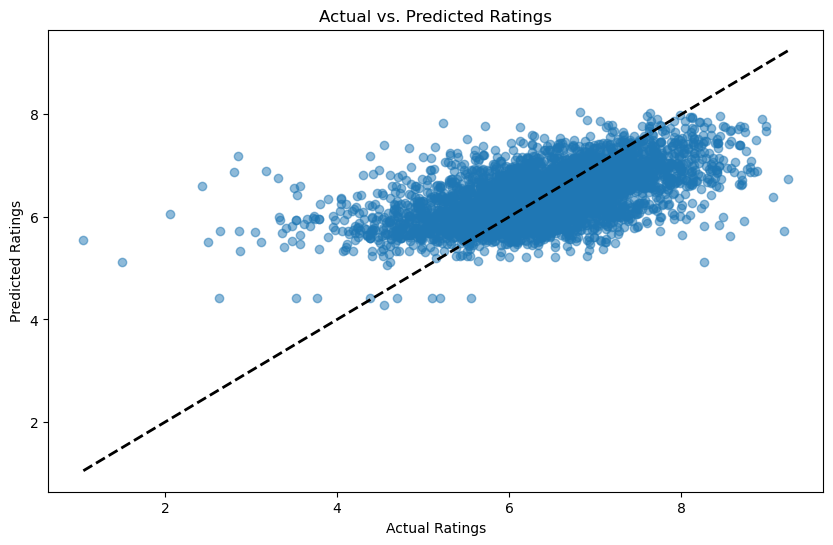

In [52]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

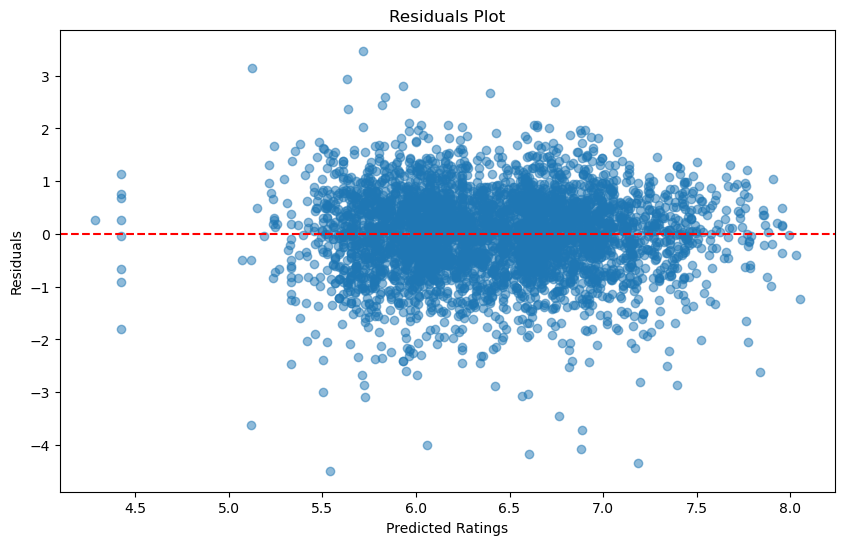

In [53]:
residuals = y_test - y_pred_rf_tuned

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_tuned, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

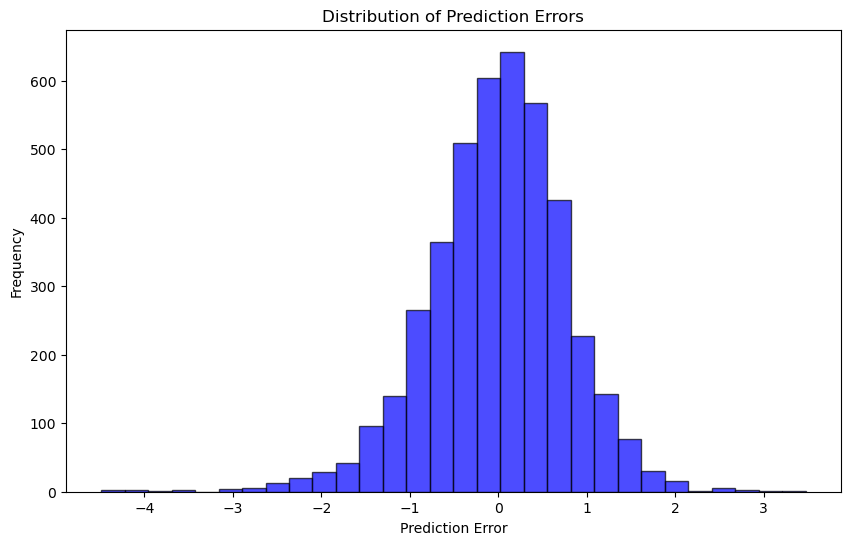

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()

In [56]:
import seaborn as sns

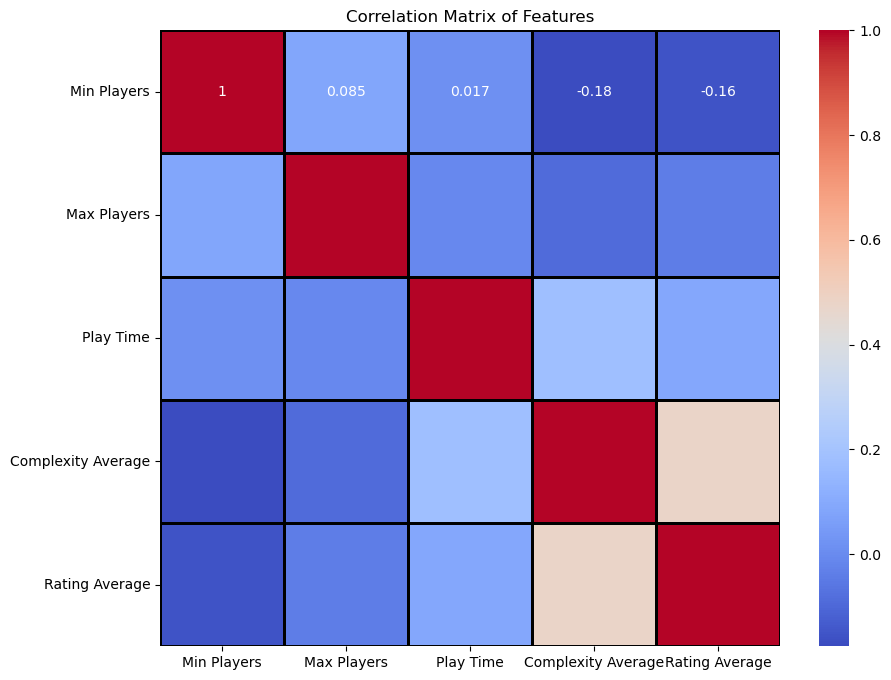

In [57]:
correlation_matrix = df[['Min Players', 'Max Players', 'Play Time', 'Complexity Average', 'Rating Average']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=2, linecolor='black')
plt.title('Correlation Matrix of Features')
plt.show()

notable relationship is the slight positive correlation between Complexity Average and Rating Average, suggesting that more complex games tend to receive slightly higher ratings, although the effect is small.
other than that not really any strong correlations

Neuaral net

In [2]:
pip install tensorflow

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/385.0 MB 2.2 MB/s eta 0:02:57
   ---------------------------------------- 0.2/385.0 MB 3.0 MB/s eta 0:02:08
   ---------------------------------------- 0.4/385.0 MB 2.5 MB/s eta 0:02:36
   ---------------------------------------- 0.7/385.0 MB 3.7 MB/s eta 0:01:45
   ---------------------------------------- 1.2/385.0 MB 5.2 MB/s eta 0:01:14
   ---------------------------------------- 1.7/385.0 MB 6.5 MB/s eta 0:00:59
   ---------------------------------------- 2.3/385.0 MB 7.4 MB/s eta 0:00:52
   ---------------------------------------- 2.9/385.0 MB 7.7 MB/s eta 0:00:50
   ---------------------------------------- 3.3/385.0 MB 8.1 MB/s eta 0:00:48
   ---------------------------------------- 3.7/385.0 MB 8.2 MB/s eta 0:00:

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [6]:
X = df[['Min Players', 'Max Players', 'Play Time', 'Complexity Average']]
y = df['Rating Average']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (neural networks perform better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Initialize the neural network model
model = Sequential()

# Adding input layer (number of neurons = number of features) and one hidden layer with 64 neurons
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Add another hidden layer with 32 neurons
model.add(Dense(units=32, activation='relu'))

# Add the output layer (for regression, no activation function)
model.add(Dense(units=1))

# Compiling model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\Brandon Olvera\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 15.2681 - val_loss: 1.2560
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9882 - val_loss: 0.7731
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.7530 - val_loss: 0.6583
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.6534 - val_loss: 0.6521
Epoch 5/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - loss: 0.6368 - val_loss: 0.6606
Epoch 6/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - loss: 0.6407 - val_loss: 0.6511
Epoch 7/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6187 - val_loss: 0.7999
Epoch 8/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6706 - val_loss: 0.6654
Epoch 9/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6374 - val_loss: 0.6472
Epoch 10/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6506 - val_loss: 0.6354
Epoch 11/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6490 - val_loss: 0.6437
Epoch 12/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s

In [9]:
# Evaluating the model on the test set
y_pred_nn = model.predict(X_test_scaled)

# Calculating performance
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print(f'Neural Network MSE: {mse_nn}')
print(f'Neural Network RMSE: {rmse_nn}')

133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Neural Network MSE: 0.6310404089703919
Neural Network RMSE: 0.7943805190023179


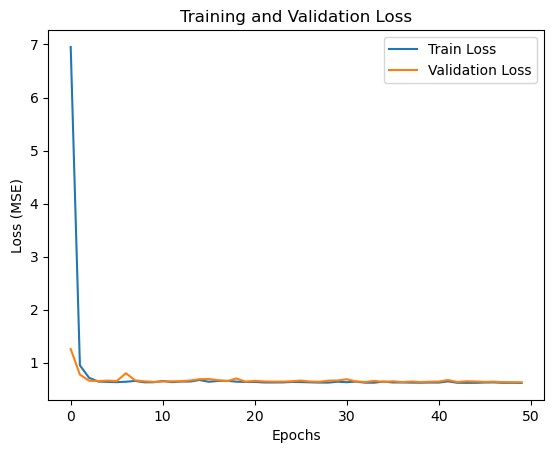

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [11]:
def categorize_ratings(rating):
    if rating < 3.0:
        return 'Low'
    elif rating < 7.0:
        return 'Medium'
    else:
        return 'High'

df['Rating Category'] = df['Rating Average'].apply(categorize_ratings)

# Encode categories as numbers for the neural network
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Rating Category Encoded'] = encoder.fit_transform(df['Rating Category'])

# Now use the encoded 'Rating Category Encoded' as the target variable
X = df[['Min Players', 'Max Players', 'Play Time', 'Complexity Average']]
y = df['Rating Category Encoded']

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming the features and target have already been prepared
# Encode the target labels into numerical format
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(df['Rating Category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert the y_train and y_test into one-hot encoded format for neural network classification
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [17]:
# Build the classification neural network
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))

# Output layer for classification (3 categories: Low, Medium, High)
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_nn = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred_nn, axis=1)

# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:\n", cm)

print("Classification Report:\n", classification_report(y_test, y_pred_classes, target_names=encoder.classes_))

Epoch 1/50


c:\Users\Brandon Olvera\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


424/424 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7410 - loss: 0.6732 - val_accuracy: 0.7941 - val_loss: 0.4632
Epoch 2/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - accuracy: 0.7823 - loss: 0.4846 - val_accuracy: 0.7929 - val_loss: 0.4575
Epoch 3/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - accuracy: 0.7834 - loss: 0.4830 - val_accuracy: 0.7941 - val_loss: 0.4554
Epoch 4/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.7826 - loss: 0.4753 - val_accuracy: 0.7906 - val_loss: 0.4565
Epoch 5/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7814 - loss: 0.4781 - val_accuracy: 0.7926 - val_loss: 0.4507
Epoch 6/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7817 - loss: 0.4748 - val_accuracy: 0.7971 - val_loss: 0.4511
Epoch 7/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - accuracy: 0.7846 - loss: 0.4684 - val_accuracy: 0.7909 - val_loss: 0.4498
Epoch 8/50
424/424 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7834 - loss: 0.4658 - val_accuracy: 0.794

c:\Users\Brandon Olvera\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Brandon Olvera\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Brandon Olvera\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
